# DS1000D Rigol Waveform Examples

**Scott Prahl**

**Aug 2023**

This notebook illustrates shows how to extract signals from a `.wfm` file created by a the Rigol DS1102D scope.  

*If RigolWFM is not installed, uncomment the following cell (i.e., delete the #) and run (shift-enter)*

In [1]:
#!pip install --user RigolWFM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

try:
    import RigolWFM.wfm as rigol
except ModuleNotFoundError:
    print('RigolWFM not installed. To install, uncomment and run the cell above.')
    print('Once installation is successful, rerun this cell again.')

repo = "https://github.com/scottprahl/RigolWFM/raw/main/wfm/"

A list of Rigol scopes in the DS1000D family is:

In [2]:
print(rigol.DS1000D_scopes[:])

['D', '1000D', 'DS1000D', 'DS1102D', 'DS1052D']


## DS1102D

We will start with a `.wfm` file from a Rigol DS1102D scope. 


### Now for the `.wfm` data

First a textual description.

In [3]:
# raw=true is needed because this is a binary file
wfm_url = "https://github.com/scottprahl/RigolWFM/raw/main/wfm/DS1102D-A.wfm" + "?raw=true"  
w = rigol.Wfm.from_url(wfm_url, '1000D')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/main/wfm/DS1102D-A.wfm?raw=true'
    General:
        File Model   = wfm1000d
        User Model   = 1000D
        Parser Model = wfm1000d
        Firmware     = unknown
        Filename     = DS1102D-A.wfm
        Channels     = [1, 2]

     Channel 1:
         Coupling =  unknown
            Scale =     1.00  V/div
           Offset =    -3.00  V
            Probe =       1X
         Inverted =    False

        Time Base =  500.000 µs/div
           Offset =  432.000 µs
            Delta =   10.000 µs/point
           Points =     1024

         Count    = [        1,        2,        3  ...      1023,     1024]
           Raw    = [        0,       80,      195  ...        80,       80]
           Times  = [-4.688 ms,-4.678 ms,-4.668 ms  ...  5.542 ms, 5.552 ms]
           Volts  = [  8.08  V,  4.88  V,280.00 mV  ...   4.88  V,  4.88  V]

     Channel 2:
         Coupling =  unknown
            Scale =     2.00  V/div
        

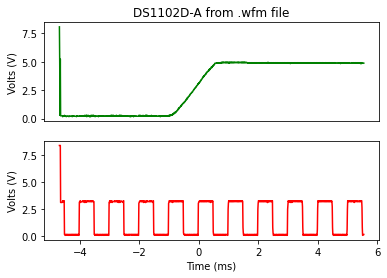

In [13]:
ch = w.channels[0]
plt.subplot(211)
plt.plot(ch.times*1000, ch.volts, color='green')
plt.title("DS1102D-A from .wfm file")
plt.ylabel("Volts (V)")
#plt.xlim(-0.6,0.6)

plt.xticks([])

ch = w.channels[1]
plt.subplot(212)
plt.plot(ch.times*1000, ch.volts, color='red')
plt.xlabel("Time (ms)")
plt.ylabel("Volts (V)")
#plt.xlim(-0.6,0.6)

plt.show()

## DS1102D

<img src="https://github.com/scottprahl/RigolWFM/raw/main/wfm/DS1102D-A.bmp" width="40%">


### First the `.csv` data

Let's look at what the accompanying `.csv` data looks like.

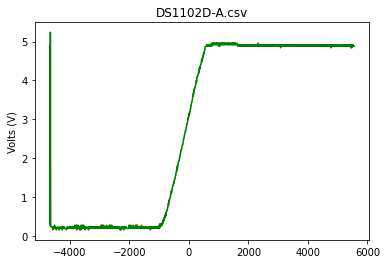

In [5]:
filename = "DS1102D-A.csv"

csv_data = np.genfromtxt(repo+filename, delimiter=',', skip_header=2).T

plt.plot(csv_data[0]*1e6,csv_data[1], color='green')
plt.title(filename)
plt.ylabel("Volts (V)")
plt.show()

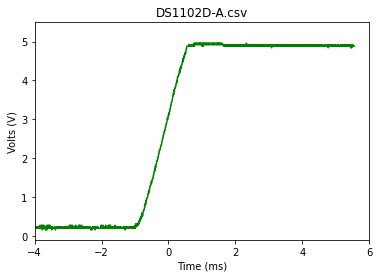

In [8]:
ch = w.channels[0]
plt.plot(csv_data[0]*1e3,csv_data[1], color='green')

plt.title(filename)
plt.ylabel("Volts (V)")
plt.xlabel("Time (ms)")
plt.xlim(-4,6)
plt.show()

### Now for the `.wfm` data

First a textual description.

In [9]:
# raw=true is needed because this is a binary file
wfm_url = "https://github.com/scottprahl/RigolWFM/raw/main/wfm/DS1102D-A.wfm" + "?raw=true"  
w = rigol.Wfm.from_url(wfm_url, '1000D')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/main/wfm/DS1102D-A.wfm?raw=true'
    General:
        File Model   = wfm1000d
        User Model   = 1000D
        Parser Model = wfm1000d
        Firmware     = unknown
        Filename     = DS1102D-A.wfm
        Channels     = [1, 2]

     Channel 1:
         Coupling =  unknown
            Scale =     1.00  V/div
           Offset =    -3.00  V
            Probe =       1X
         Inverted =    False

        Time Base =  500.000 µs/div
           Offset =  432.000 µs
            Delta =   10.000 µs/point
           Points =     1024

         Count    = [        1,        2,        3  ...      1023,     1024]
           Raw    = [        0,       80,      195  ...        80,       80]
           Times  = [-4.688 ms,-4.678 ms,-4.668 ms  ...  5.542 ms, 5.552 ms]
           Volts  = [  8.08  V,  4.88  V,280.00 mV  ...   4.88  V,  4.88  V]

     Channel 2:
         Coupling =  unknown
            Scale =     2.00  V/div
        

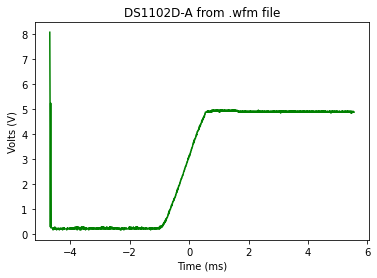

In [11]:
ch = w.channels[0]
plt.plot(ch.times*1000, ch.volts, color='green')
plt.title("DS1102D-A from .wfm file")
plt.ylabel("Volts (V)")
plt.xlabel("Time (ms)")

plt.show()

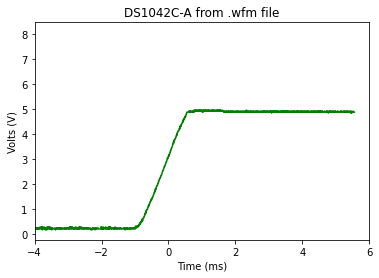

In [12]:
ch = w.channels[0]
plt.plot(ch.times*1e3, ch.volts, color='green')
plt.title("DS10102D-A from .wfm file")
plt.ylabel("Volts (V)")
plt.xlabel("Time (ms)")
plt.xlim(-4,6)
plt.show()